In [1]:
import pyautogui as pg

In [2]:
import numpy as np
from PIL import Image as im

In [3]:
def im_load(img_ori,lu,rb,sz = 3):
    img = img_ori.convert('L')
    img = img.crop((lu[0],lu[1],rb[0],rb[1]))
    img = img.resize((int(img.width/sz),int(img.height/sz)))

    img_array = np.array(img)

    return img_array

In [4]:
img = im.open('brain.png')

In [5]:
class zip_map:
    def __init__(self,img,lu,rb):
        self.map = im_load(img,lu,rb)

        self.end_y = len(self.map)
        self.end_x = len(self.map[0])

        self.st_y = 0
        self.st_x = 0

        # for y in range(self.st_y,self.end_y):
        #     for x in range(self.st_x,self.end_x):
        #         if self.map[y][x]<value:
        #             self.map[y][x] = 0

    def get_max(self,val,f_val):
        if val>f_val:
            val = f_val
        return val

    def get_min(self,val,f_val):
        if val<f_val:
            val = f_val
        return val

    def get_scope(self,x,y,size):
        max_x = self.get_max(x+size,self.end_x)
        max_y = self.get_max(y+size,self.end_y)

        min_x = self.get_min(x-size,self.st_x)
        min_y = self.get_min(y-size,self.st_y)

        return (min_x,min_y),(max_x,max_y)
                
    def get_scope_val(self,x,y,lu,rb):
        lst = []
        for y in range(lu[1],rb[1]):
            for x in range(lu[0],rb[0]):
                lst.append(self.map[y][x])

        return np.average(lst),np.min(lst)

    def clean_map(self, size = 2):
        map_new = np.zeros((self.end_y-self.st_y,self.end_x-self.st_x),dtype='uint8')
        lst = []

        for y in range(self.st_y,self.end_y,4):
            for x in range(self.st_x,self.end_x,4):
                st_v, end_v = self.get_scope(x,y,size = 4)

                val,_ = self.get_scope_val(x,y,st_v,end_v)
                val = int(val/5)*5
                if val>10:
                    lst.append(val)
        if len(lst)>0:
            th = np.bincount(lst).argmax()
        else:
            th = 0
        
        for y in range(self.st_y,self.end_y):
            for x in range(self.st_x,self.end_x):
                st_v, end_v = self.get_scope(x,y,size = 1)
                avg_v,min_v = self.get_scope_val(x,y,st_v,end_v)
                avg_v = int(avg_v/5)*5
                min_v = int(min_v/5)*5
                if min_v>th and avg_v>th+20:
                    map_new[y][x] = 255

                st_v_n, end_v_n = self.get_scope(x,y,size = 10)
                avg_v_n,min_v_n = self.get_scope_val(x,y,st_v,end_v)

                if  avg_v_n>235:
                    for ay in range(st_v_n[1],end_v_n[1]):
                        for ax in range(st_v_n[0],end_v_n[0]):
                            map_new[ay][ax] = 0

        return map_new



In [6]:
t = zip_map(img,(10,10),(1000,1000))

In [7]:
arr = t.clean_map()

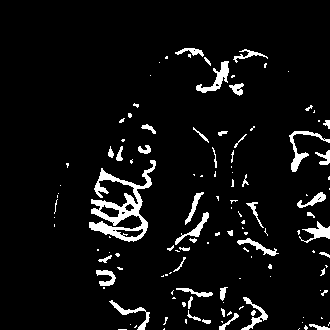

In [8]:
im.fromarray(arr)